# Milestone 1

Milestone 1 assignment by Arvin Assanny from Batch-HCK-003

Link Dashboard:
https://public.tableau.com/app/profile/arvin8013/viz/Milestone1_16717267710400/Dashboard1

## Identifying Problem
#### Background:
You are working in a growing e-commerce platform which focused on car listing on Brazil. The CEO of the company asked the Data Team to make car price prediction model, which may help the buyers to undersatnd the actual market value of a car before buying. As a `Data Analyst`, you are tasked to analyze used car price in Brazil first and required to use statistics and data visualization while doing our EDA (Exploratory Data Analysis) project. This early analysis is needed before we make the car price prediction model in near future, together with data scientist in our team.

#### Topics: 
Analyzing car prices in Brazil to get more understanding of Car sales market in Brazil by using dataset that was collected from 2022.

#### Problem Statement: 
`Find what are the factors that determine average car price in Brazil on 2022`

#### Bussines Objective:
To obtain the objectives we will use 5W+1H method to determine what are the question we need to answer, in order to analyzing the dataset we have.

 1. What is the most popular brand in Brazil?

 2. What is the average price from each top 10 brand in 2022?

 3. What model year car has the highest price from the last decade?

 4. What are some the oldest car still used?

 5. Which gear type is preferred the most and how is price affected by it?
 
 6. How do model year affects the resale values in different brands?

 7. (`Infrential Statistic`) We want to compare whether a fuel type will affects different averege price than the other one?

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

Now we already import some library we will use for this project.

## Loading Data

In [2]:
df = pd.read_csv('fipe_2022.csv')

## Source dataset: https://www.kaggle.com/datasets/vagnerbessa/average-car-prices-bazil

We are using dataset of average car prices in Brazil, which updated on a monthly basis. Here we will show the description of every column that present on our table.
out the features of the data set:

|Id|Feature|Description|
|:--|:--|:--|
|01| year_of_reference    | Year of the observation| 
|02| month_of_reference   | Month of the observation|  
|03| fipe_code            | Unique id on FIPE Website| 
|04| authentication       | Unique code on FIPE Website|   
|05| brand                | Car brand name|
|06| model                | Car description|
|07| fuel                 | Car Fuel type |
|08| gear                 | How gear shifted|
|09| engine_size          | Engine size measured in cubic centimeters|
|10| year_model           | Year of manufacture|
|11| avg_price_brl        | Car prices in Brazilian Real|
|12| age_years            | Difference between current year and year_model|

## Data Preprocessing

After loading our data we will do some overview and cleaning.

In [3]:
df

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32
...,...,...,...,...,...,...,...,...,...,...,...,...
290270,2022,December,061001-1,lzrp3rpklh8q,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2009,22894.0,14
290271,2022,December,061001-1,lrfw427w9v5h,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2008,22270.0,15
290272,2022,December,061001-1,lh98rfxnhy18,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2007,21663.0,16
290273,2022,December,061001-1,k9dtwsps5sy1,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2006,21073.0,17


Here are some overview of our data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290275 entries, 0 to 290274
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   290275 non-null  int64  
 1   month_of_reference  290275 non-null  object 
 2   fipe_code           290275 non-null  object 
 3   authentication      290275 non-null  object 
 4   brand               290275 non-null  object 
 5   model               290275 non-null  object 
 6   fuel                290275 non-null  object 
 7   gear                290275 non-null  object 
 8   engine_size         290275 non-null  float64
 9   year_model          290275 non-null  int64  
 10  avg_price_brl       290275 non-null  float64
 11  age_years           290275 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 26.6+ MB


We got 5 columns with numerical datatype and 7 with string datatype

In [5]:
print('Data Shape:', df.shape)
df.sample(5)

Data Shape: (290275, 12)


,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
259143,2022,November,024210-1,zdkdps4rwny1,Peugeot,2008 Allure 1.6 Flex 16V 5p Mec.,Gasoline,manual,1.6,2016,53069.0,7
163272,2022,July,025129-1,lpdnj4q0pg18,Renault,Megane Grand Tour Dynam. Hi-Flex 1.6 16V,Gasoline,manual,1.6,2007,22096.0,16
286590,2022,December,002041-9,vbs54bl1972x,Toyota,Hilux CD SR5 4x4 2.8 Diesel,Diesel,manual,2.8,1997,42344.0,26
173006,2022,August,004435-0,yshrwf64pw18,GM - Chevrolet,SPIN LS 1.8 8V Econo.Flex 5p Mec.,Gasoline,manual,1.8,2017,51444.0,6
238701,2022,October,005015-6,j0vg3zq01sp,VW - VolksWagen,Quantum 2.0 Mi,Gasoline,manual,2.0,2000,17699.0,23


Here we know that there 290273 rows and 12 columns in the dataset, we also show 5 random rows from our data using .sample() function.

In [6]:
df.isnull().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
age_years             0
dtype: int64

We have no missing values in our data, which is good. But also we need to see, if there is an error with our data such as duplicated data

In [7]:
dup = df.duplicated(keep = False).sum()
print('Total Duplicate:', dup)

# Show duplicate in dataframe
df[df.duplicated(keep = False)]

Total Duplicate: 4


,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
98996,2022,May,004051-7,gb76cyvp29j4,GM - Chevrolet,Monza Classic SE 2.0 /MPFI e EFI 2p e 4p,Gasoline,manual,2.0,1992,10655.0,31
99002,2022,May,004051-7,gb76cyvp29j4,GM - Chevrolet,Monza Classic SE 2.0 /MPFI e EFI 2p e 4p,Gasoline,manual,2.0,1992,10655.0,31
275481,2022,December,003296-4,3r6c277cnqcb,Ford,Ranger Limited 3.0 PSE 4x4 CD TB Diesel,Diesel,manual,3.0,2007,64638.0,16
275482,2022,December,003296-4,3r6c277cnqcb,Ford,Ranger Limited 3.0 PSE 4x4 CD TB Diesel,Diesel,manual,3.0,2007,64638.0,16


After this we will drop the duplicates using .drop_duplicated()

In [8]:
df.drop_duplicates(keep='first', inplace=True)

In [9]:
df[df.duplicated()].any()

year_of_reference     False
month_of_reference    False
fipe_code             False
authentication        False
brand                 False
model                 False
fuel                  False
gear                  False
engine_size           False
year_model            False
avg_price_brl         False
age_years             False
dtype: bool

After make sure we have dropped the duplicated data, now do some data cleaning again.

Here we have some columns that have no use in our analysis, these columns will be dropped from our table.

In [10]:
df.drop(columns=['fipe_code', 'authentication'], inplace=True)

We dropped this two columns because both of columns did not give us much insight and information.

In [11]:
df

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32
...,...,...,...,...,...,...,...,...,...,...
290270,2022,December,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2009,22894.0,14
290271,2022,December,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2008,22270.0,15
290272,2022,December,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2007,21663.0,16
290273,2022,December,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2006,21073.0,17


Now we have dropped some of the columns we do not need in this analysis, we can go ahead to do some exploratory data analysis.

## Exploratory Data Analysis

Now we will try to understand deeper with our data by doing analysis using statistics and hypothesis testing. We also will make some data visualization to help us understand more.

First we want to see Cental Tendency Measure from our data, where we will calculate mean, median, and mode of some of our columns. Also we will check the distribution of the data itself.

We will calculate for avg_price_brl column first.

In [12]:
# Checking central tendecies
print ('Mean: ' + str(df['avg_price_brl'].mean()))
print ('Mode: ' + str(df['avg_price_brl'].mode()[0]))
print ('Median: ' + str(df['avg_price_brl'].median()))
print ('Min: ' + str(df['avg_price_brl'].min()))
print ('Max: ' + str(df['avg_price_brl'].max()))

Mean: 122087.78798579269
Mode: 10521.0
Median: 46836.0
Min: 1831.0
Max: 8600000.0


By doing this, we now the range of our data. We will also check distribution of avg_price_brl

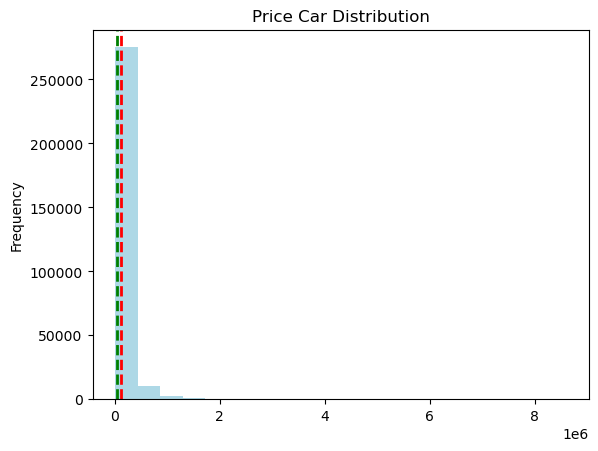

Skewness value: 11.450428596391886


In [13]:
# Make histogram to see the distribution of the data
df['avg_price_brl'].plot.hist(title='Price Car Distribution', color='lightblue', bins=20)  
plt.axvline(df['avg_price_brl'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(df['avg_price_brl'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

# Checking skewness of the data
print('Skewness value: ' + str(df['avg_price_brl'].skew()))

From this plot we can see the distribution of the data from avg_price_brl column is right skewed with extreme degrees. This may caused by so many variations in our data which is normal because the price of the car is defined by so many factors, so having this kind of distribution is expected from this dataset.

Next we want to check age_years column which represent how old the car from the first time it was manufactured.

In [14]:
# Checking central tendecies
print ('Mean: ' + str(df['age_years'].mean()))
print ('Mode: ' + str(df['age_years'].mode()[0]))
print ('Median: ' + str(df['age_years'].median()))
print ('Min: ' + str(df['age_years'].min()))
print ('Max: ' + str(df['age_years'].max()))

Mean: 14.103302752925694
Mode: 8
Median: 13.0
Min: 0
Max: 38


Here we can see the range of our data.

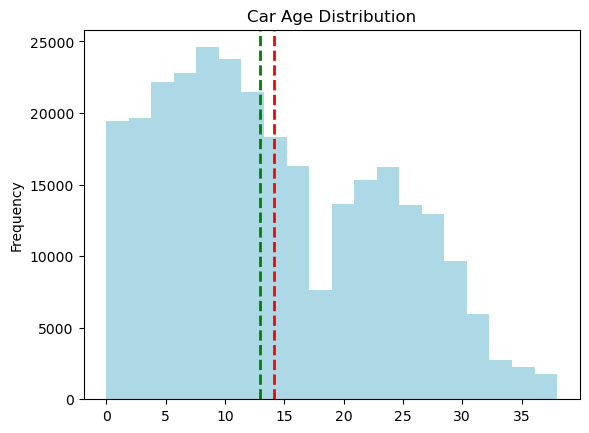

Skewness value: 0.38413185609318434


In [15]:
# Make histogram to see the distribution of the data
df['age_years'].plot.hist(title='Car Age Distribution', color='lightblue', bins=20)  
plt.axvline(df['age_years'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(df['age_years'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

# Checking skewness of the data
print('Skewness value: ' + str(df['age_years'].skew()))

We know that the distribution from this data is considered normal because the skewness value is still on the range of normal distribution, which is (-0,5) - 0,5.

From this distribution we know that most of our data of car age have the average of 14 years.

Next we want to check model_year column which represent when the first time the car was manufactured.

In [16]:
# Checking central tendecies
print ('Mean: ' + str(df['year_model'].mean()))
print ('Mode: ' + str(df['year_model'].mode()[0]))
print ('Median: ' + str(df['year_model'].median()))
print ('Min: ' + str(df['year_model'].min()))
print ('Max: ' + str(df['year_model'].max()))

Mean: 2008.8966972470744
Mode: 2015
Median: 2010.0
Min: 1985
Max: 2023


By doing this, we now the range of our data. We will also check distribution of year_model column

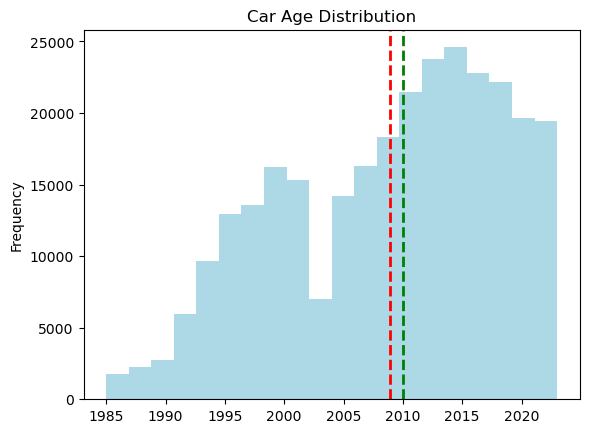

Skewness value: -0.3841318560932055


In [17]:
# Make histogram to see the distribution of the data
df['year_model'].plot.hist(title='Car Age Distribution', color='lightblue', bins=20)  
plt.axvline(df['year_model'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(df['year_model'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

# Checking skewness of the data
print('Skewness value: ' + str(df['year_model'].skew()))

We know that the distribution from this data is considered normal because the skewness value is still on the range of normal distribution, which is (-0,5) - 0,5.

From this distribution we have the average car model year is about 2009.

Now we will go ahead to answer some business objective using our data.

#### *What is the most popular brand in Brazil?*

Now we want to look at the most popular car brand in Brazil, where we will pick the top 10 only.

In [18]:
top_brands = df['brand'].value_counts().head(10)
top_brands

GM - Chevrolet     28178
VW - VolksWagen    28142
Fiat               26563
Ford               24149
Mercedes-Benz      17470
Renault            15194
Audi               12168
Peugeot            11132
Toyota             10309
Mitsubishi         10182
Name: brand, dtype: int64

Here we see that GM - Chevrolet is the top brand in Brazil with 28178 cars

Now we want to make bar chart to visualize this data.

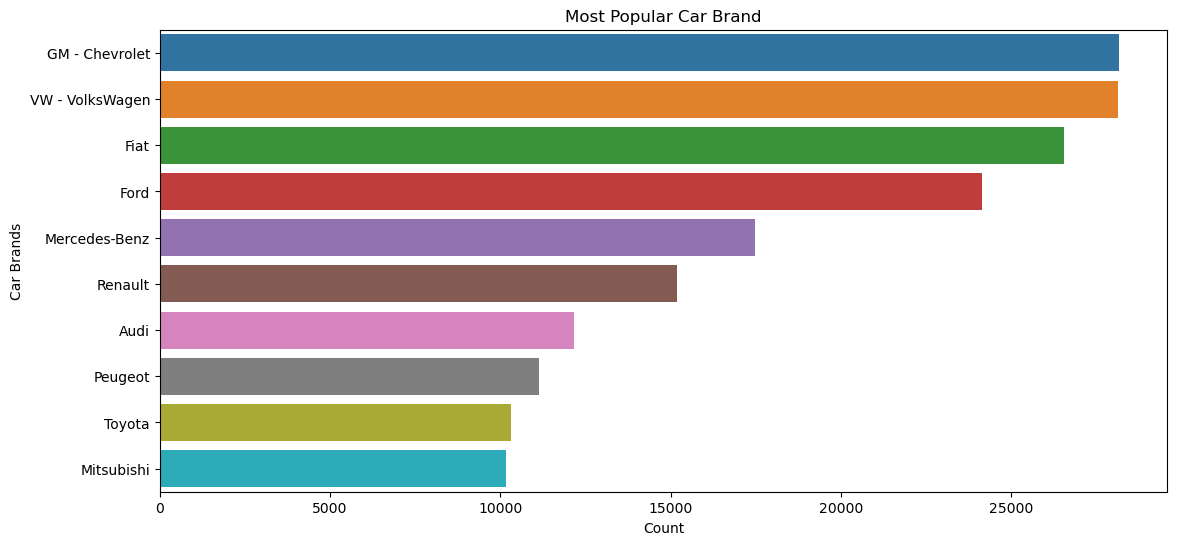

In [19]:
plt.figure(figsize=(13,6))
plt.title('Most Popular Car Brand')
plt.xlabel('Count')
plt.ylabel('Car Brands')
sns.barplot(x = top_brands.values, y = top_brands.index);

Car brand of GM - Chevrolet & VW - VolksWagen are undoubtedly the top two brand in Brazil, this fact may showed us that the two brand are the most favorite car within Brazil population.

#### *What is the average price from each top 10 brand in 2022??*

After knowing the top 10 of most favorite car in Brazil, now we want to know the average price from each top 10 brand in 2022.

In [20]:
# Select top 10 most frequent observations according to some variable
def top_values(data, variable, top=10):
    return data[variable].value_counts()[:top]

top10 = top_values(df, 'brand')
top10.index

Index(['GM - Chevrolet', 'VW - VolksWagen', 'Fiat', 'Ford', 'Mercedes-Benz',
       'Renault', 'Audi', 'Peugeot', 'Toyota', 'Mitsubishi'],
      dtype='object')

First we only want to include top 10 of the brand to feature in our analysis

In [21]:
mask = df['brand'].isin(top10.index)
top_10 = df[mask][['month_of_reference', 'brand', 'avg_price_brl']]
top_10

,month_of_reference,brand,avg_price_brl
185,January,Audi,14353.0
186,January,Audi,12695.0
187,January,Audi,22458.0
188,January,Audi,21445.0
189,January,Audi,19646.0
...,...,...,...
289722,December,VW - VolksWagen,85995.0
289723,December,VW - VolksWagen,103221.0
289724,December,VW - VolksWagen,95861.0
289725,December,VW - VolksWagen,110821.0


In [22]:
# We want to make new column with date datatype.
import calendar
month_date = pd.date_range(start = '2022-01-01', end = '2023-01-01', freq = '1M').tolist()
months = {calendar.month_name[i]: m for i, m in enumerate(month_date, start=1)}

# Using exsiting column to make month_date column
top_10['month_date'] = top_10['month_of_reference'].map(months)
top_10

,month_of_reference,brand,avg_price_brl,month_date
185,January,Audi,14353.0,2022-01-31
186,January,Audi,12695.0,2022-01-31
187,January,Audi,22458.0,2022-01-31
188,January,Audi,21445.0,2022-01-31
189,January,Audi,19646.0,2022-01-31
...,...,...,...,...
289722,December,VW - VolksWagen,85995.0,2022-12-31
289723,December,VW - VolksWagen,103221.0,2022-12-31
289724,December,VW - VolksWagen,95861.0,2022-12-31
289725,December,VW - VolksWagen,110821.0,2022-12-31


Here we make a new column which enable us to sort the price by month from 2022. Now we will make the visualization of our data

In [23]:
top_10.groupby(['brand']).mean().reset_index().sort_values(by = 'avg_price_brl', ascending = False)

,brand,avg_price_brl
4,Mercedes-Benz,245911.906239
0,Audi,171157.246959
8,Toyota,92086.817538
5,Mitsubishi,85786.164113
3,GM - Chevrolet,52895.385975
2,Ford,49463.559651
7,Renault,47600.900224
9,VW - VolksWagen,42277.323467
6,Peugeot,41519.542939
1,Fiat,39877.096864


Here we already can see the average price of the top 10 brands in Brazil, to help us understand more we will use lineplot to visualize it.

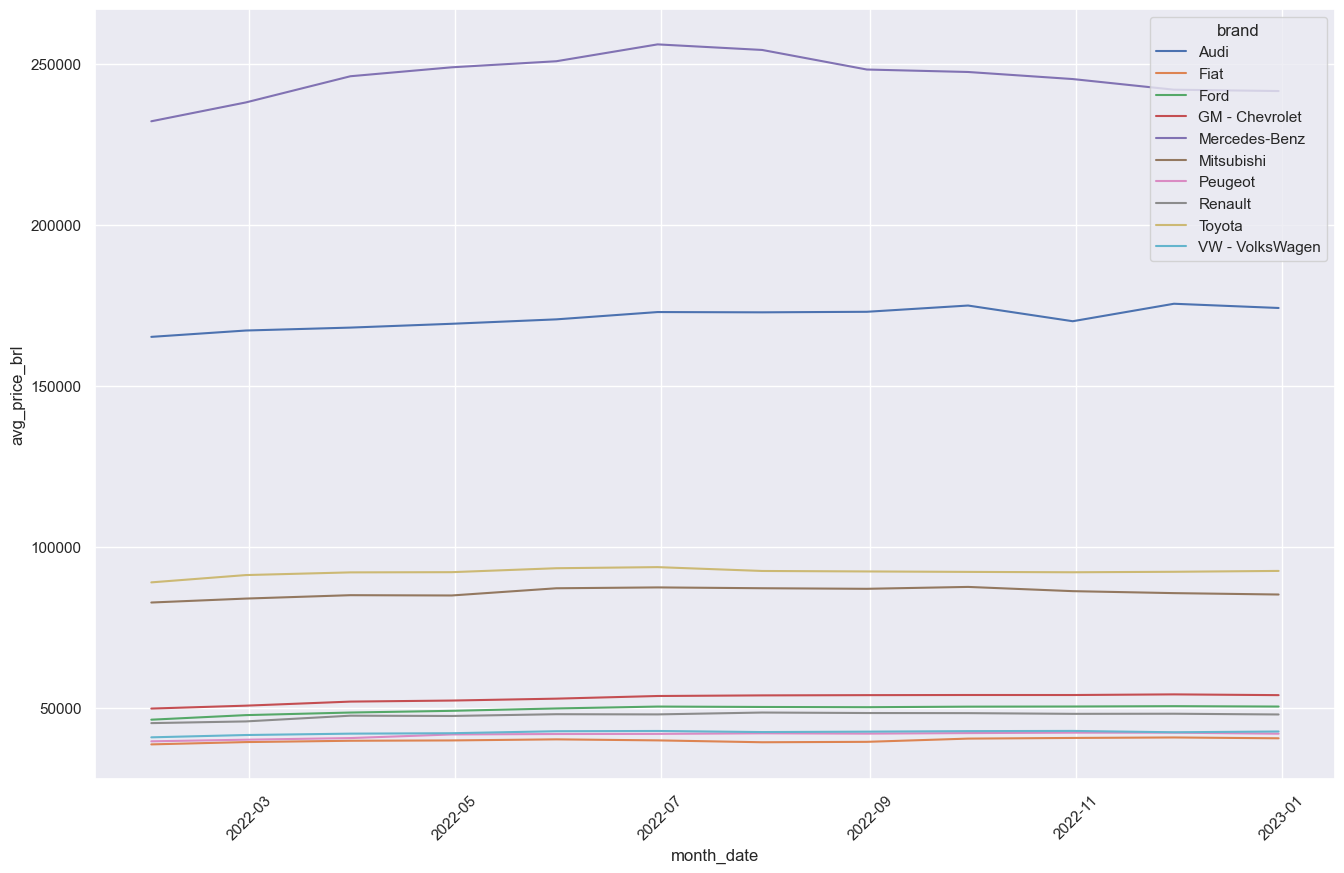

In [24]:
toplot = top_10.groupby(['brand', 'month_date']).mean()

sns.set(rc ={'figure.figsize':(16,10)})
plot = sns.lineplot(data = toplot, x = 'month_date', y = 'avg_price_brl', hue = 'brand', sort = False)
plt.xticks(rotation = 45)
plt.show()

We can see here that Mercedes-Benz has higher prices than its competitors, while GM - Chevrolet being the top favorite car brand in Brazil in the fifth place.

This might be caused by that Mercedes-Benz is already known for its expensive European car, while GM - Chevrolet is closer to home which is from United States. This may cost some money when buying a foreign made car whose much far away than its competitor (GM - Chevrolet).

##### *What model year car has the highest price from the last decade?*

 Now we want to see what model year has the highest price from the last decade.

In [25]:
top_prices = df.query('year_model >= 2012').groupby('year_model')['avg_price_brl'].max().reset_index()
top_prices


,year_model,avg_price_brl
0,2012,2819679.0
1,2013,2956552.0
2,2014,3204383.0
3,2015,3441426.0
4,2016,3649773.0
5,2017,3254510.0
6,2018,3725451.0
7,2019,6143087.0
8,2020,5785497.0
9,2021,6985840.0


To help us understand more, we need to visualize the data. Here line chart would be a good way to visualize it.

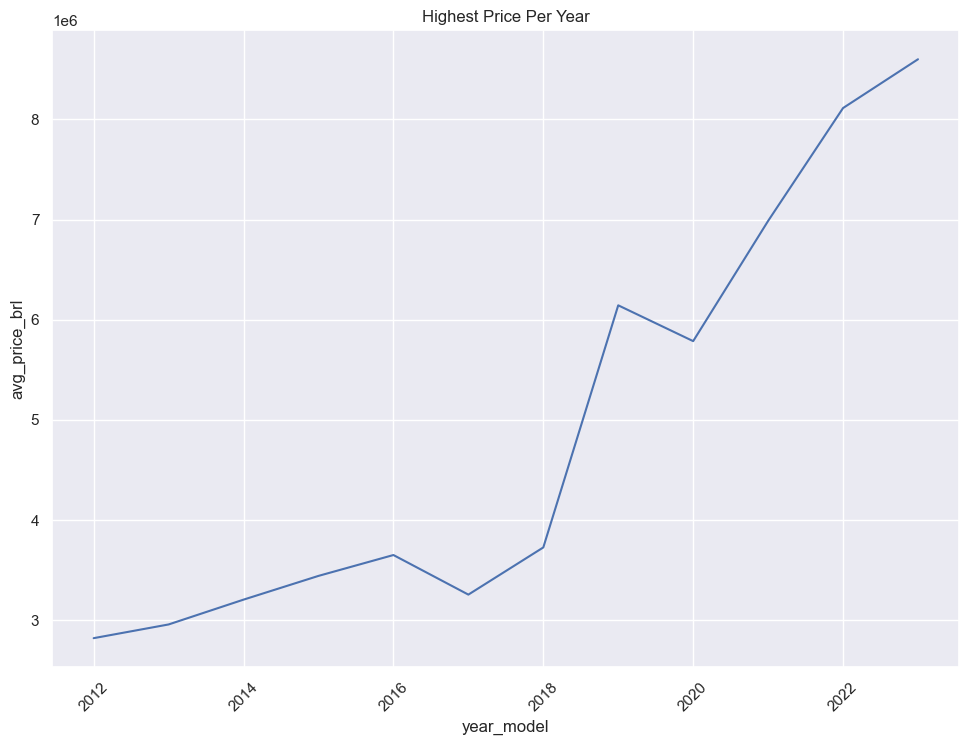

In [26]:
sns.set(rc = {'figure.figsize':(11.7,8.27)})

plot = sns.lineplot(data = top_prices, x = 'year_model', y = 'avg_price_brl')
plt.title('Highest Price Per Year')
plt.xticks(rotation = 45)
plt.show()

We can see that the price of car will almost increase from year to year, with 2023 model has the highest price compared to older one.

This is make sense because car price will naturally decrease as time goes by, and the latest one will come as the most expensive.

### *What are some the oldest car still used?*

Now we will find out what are some the oldest car still used in Brazil.

In [43]:
df['age_years'].max()

38

We know that the oldest car still used in brazil is aged 38, now we want to know what are the brand of these car.

In [45]:
oldest = df.query('age_years == 38').groupby(['brand'])['brand'].count().sort_values(ascending = False)
oldest

brand
Ford               288
GM - Chevrolet     288
VW - VolksWagen     84
Fiat                72
Mercedes-Benz       24
BRM                 12
Baby                12
Engesa              12
Name: brand, dtype: int64

We got some oldest car grouped by car brands, to help us see more clearly we will try to visualize it using pie chart.

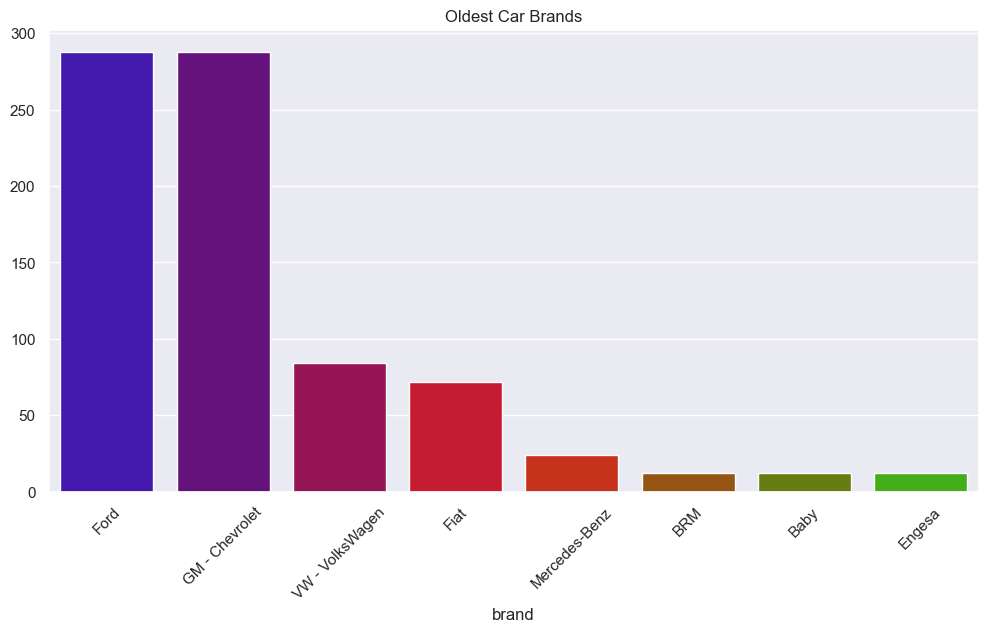

In [29]:
plt.figure(figsize=(12,6))
plt.title('Oldest Car Brands')
sns.barplot(x = oldest.index, y = oldest.values, palette='brg');
plt.xticks(rotation = 45)
plt.show()

We can see that Ford & GM - Chevrolet brands have the most of aged car still around in Brazil. This can be interpreted that Ford's & GM - Chevrolet's car are the most reliable one.

#### *Which gear type is preferred the most and how is price affected by it?*

Now we want to know what type of gear are more preferred and will this choice affects the cost to own a car. First we will have to look how many of this kind of gear, this could be translates into more the preferred one.

In [30]:
df['gear'].value_counts()

manual       210289
automatic     79984
Name: gear, dtype: int64

Here we see manual gear type is the obvious preffered one, now we will see how it affects the price

In [31]:
gear_price = df.groupby(['gear'])['avg_price_brl'].mean().round(2)
gear_price

gear
automatic    160201.15
manual       107591.27
Name: avg_price_brl, dtype: float64

We can see that the automatic type is more expansive than manual, here we will show our visualization.

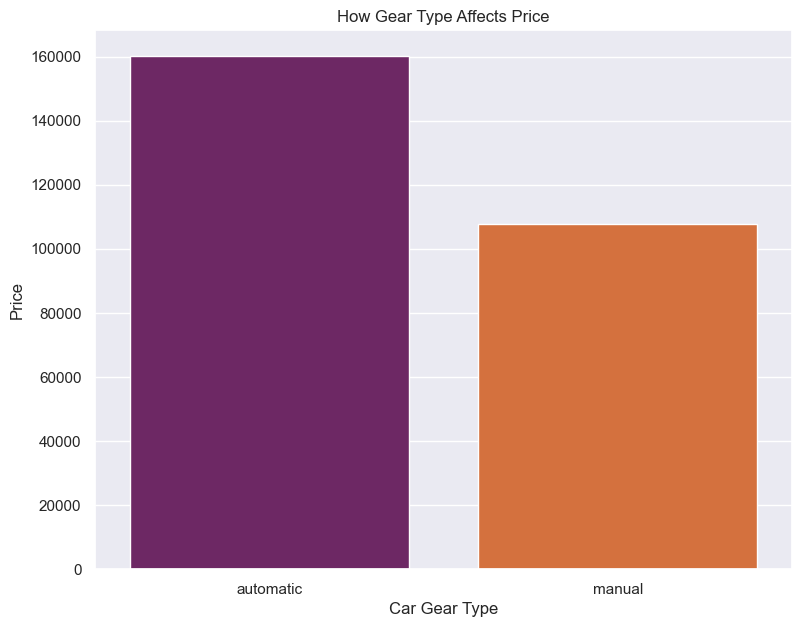

In [32]:
plt.figure(figsize=(9,7))
sns.barplot(x = gear_price.index, y = gear_price.values, palette='inferno');
plt.xlabel('Car Gear Type');
plt.ylabel('Price');
plt.title('How Gear Type Affects Price');

There are almost 60.000 BRL difference between the two type, while comparing the average price between automatic gear type with manual gear type. This is completely make sense since the automatic gear transmission is much complex and also required more cost to produce than its counterparts, so it will arguably will always translate into more expensive car price.

So we can say that, even though the manual transmission is more preferable it does not translate to higher prices, whilst the automatic transmission being not the most preferable will cost the customer a lot of money.

### *How do model year affects the resale values in different brands?*

The value of a car will drop as it ages. But, it might not be the same for all brands. Next we will find out which brand's price is affected the most, considering the top 10 brands only.

In [33]:
# We want to know Top 10 Brand by using previous function
def tb(data, variable, top=10):
    return data[variable].value_counts()[:top]

top10 = tb(df, 'brand')
top10.index

Index(['GM - Chevrolet', 'VW - VolksWagen', 'Fiat', 'Ford', 'Mercedes-Benz',
       'Renault', 'Audi', 'Peugeot', 'Toyota', 'Mitsubishi'],
      dtype='object')

Now we have the list of top brands, later we will use this to filter our new dataframe

In [34]:
# Make a new dataframe which only consist of top 10 brands
topdf = df.loc[df['brand'].isin(top10.index)]

# Slicing data
yeargroup_18_23 = topdf.loc[df.year_model >= 2018]
yeargroup_18_23.sample(2)

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
197578,2022,September,GM - Chevrolet,ONIX HATCH RS 1.0 TB 12V Flex 5p Aut.,Gasoline,automatic,1.0,2021,88539.0,2
163700,2022,July,Renault,SANDERO SPORT RS 2.0 Flex 16V 5p,Gasoline,manual,2.0,2018,63704.0,5


In [35]:
# Slicing data
yeargroup_13_18 = topdf.loc[(df.year_model < 2018) & (df.year_model >= 2013)]
yeargroup_13_18.sample(2)

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
31786,2022,February,Fiat,Strada Adv.Ext. 1.8 LOCKER Dual. Flex CD,Gasoline,manual,1.8,2016,63315.0,7
208806,2022,September,Mitsubishi,Pajero DAKAR 3.2 4x4 T.I. Dies. 5p Mec.,Diesel,manual,3.2,2013,115893.0,10


After preparing the data we will plot the data into a stacked bar plot, this will help us to compare the different of prices.

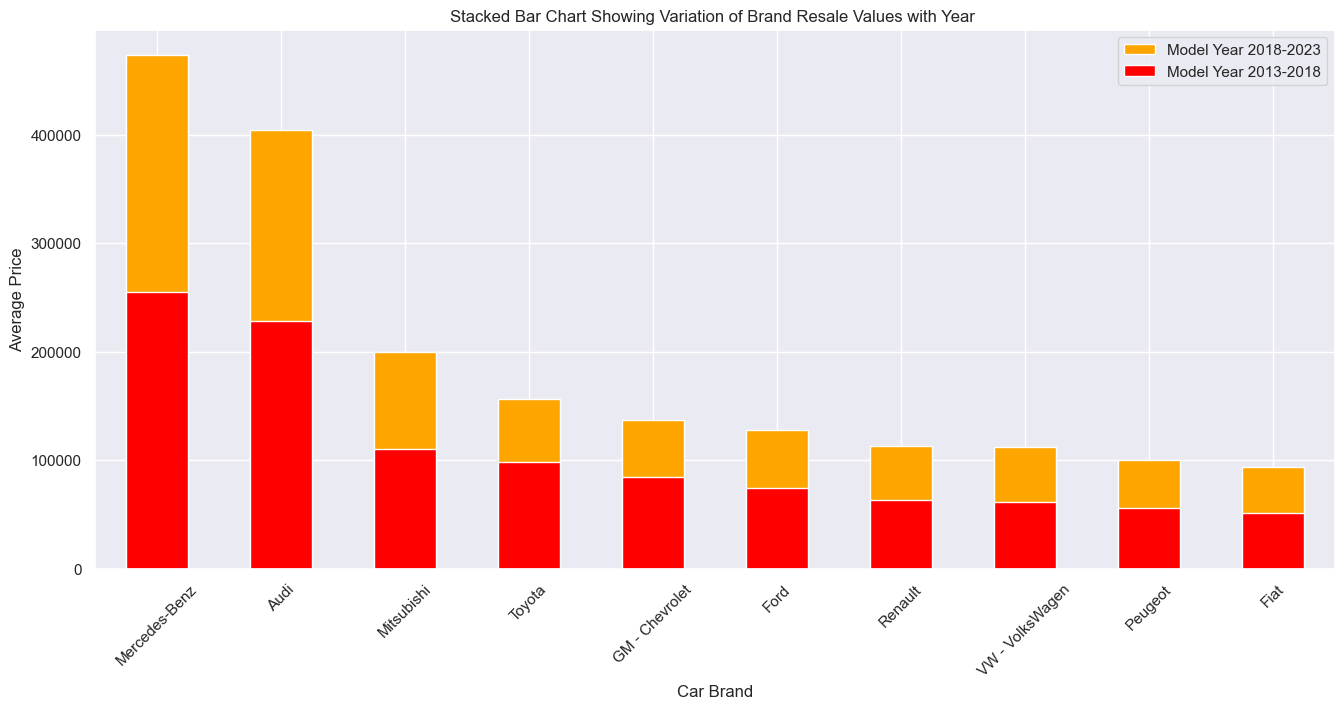

In [36]:
yeargroup_18_23.groupby(['brand'])['avg_price_brl'].mean().sort_values(ascending = False).plot(kind='bar', figsize=(16,7), color='orange');
yeargroup_13_18.groupby(['brand'])['avg_price_brl'].mean().sort_values(ascending = False).plot(kind='bar', figsize=(16,7), color='red');
plt.xlabel('Car Brand')
plt.ylabel('Average Price')
plt.title('Stacked Bar Chart Showing Variation of Brand Resale Values with Year ')
plt.legend(labels=('Model Year 2018-2023', 'Model Year 2013-2018'))
plt.xticks(rotation = 45);

Here we can see that every car brands will lose the value of their intial price, for this plot we use avarage car prices from model year 2018-2023 and compare the avarage car prices from model year 2013-2018.

From this barplot, we can see brands such as Mercedes-Benz and Audi experiencing huge decrease of value while brands such as Chevrolet, Toyota, and Ford are more stable.

This may be cause by the fact that car brand such as Mercedes-Benz and Audi are a luxury brand so their prices will drastically decrease over the year, while the more affordable ones are more stable.

### *We want to compare whether a fuel type will affects different average car price than the other one?*

This question will be answered using Hypothesis testing, we want to check whether fuel type will affect average car price of are significantly different or not using two samples independent two tailed test.

We will define the H0 and H1 of our test.

`H0: μ Car price with Gasoline fuel type  = μ Car price with Diesel fuel type`

`H1: μ Car price with Gasoline fuel type  != μ Car price with Diesel fuel type` 

Here we choose only 2 of 3 type fuel in this dataset to be compared, since Gasoline and Diesel is much more popular to use in the world.

First we have to find out the data that will be tested. We will try to filter the data that meets the conditions then calculate their average price.

In [37]:
avg_gas = df[df['fuel'] == 'Gasoline']
avg_gas.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_reference,238773.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0
engine_size,238773.0,2.181225,1.065706,0.7,1.6,1.8,2.5,6.7
year_model,238773.0,2008.908595,9.251026,1985.0,2001.0,2010.0,2016.0,2023.0
avg_price_brl,238773.0,123894.438249,350835.536579,1831.0,20310.0,42104.0,93096.0,8600000.0
age_years,238773.0,14.091405,9.251026,0.0,7.0,13.0,22.0,38.0


In [38]:
avg_dis = df[df['fuel'] == 'Diesel']
avg_dis.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_reference,47011.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0
engine_size,47011.0,2.753753,0.694867,1.5,2.3,2.7,3.0,6.7
year_model,47011.0,2009.818702,9.120095,1985.0,2003.0,2011.0,2018.0,2023.0
avg_price_brl,47011.0,123462.163047,116271.547429,5309.0,46258.5,88872.0,164551.0,1034127.0
age_years,47011.0,13.181298,9.120095,0.0,5.0,12.0,20.0,38.0


From using .describe() function we can see mean and stadard deviation of two data we want to compare.

In [39]:
t_stat, p_val = stats.ttest_ind(avg_gas['avg_price_brl'], avg_dis['avg_price_brl'])
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.7915428263191508
t-statistics: 0.2643079488364851


Using this method we will see if there are any significance diferences in average car price between two fuel type.

Now we will try to simulate our result using random number to predict our future data.

-563730.5779430978
811519.4544408591


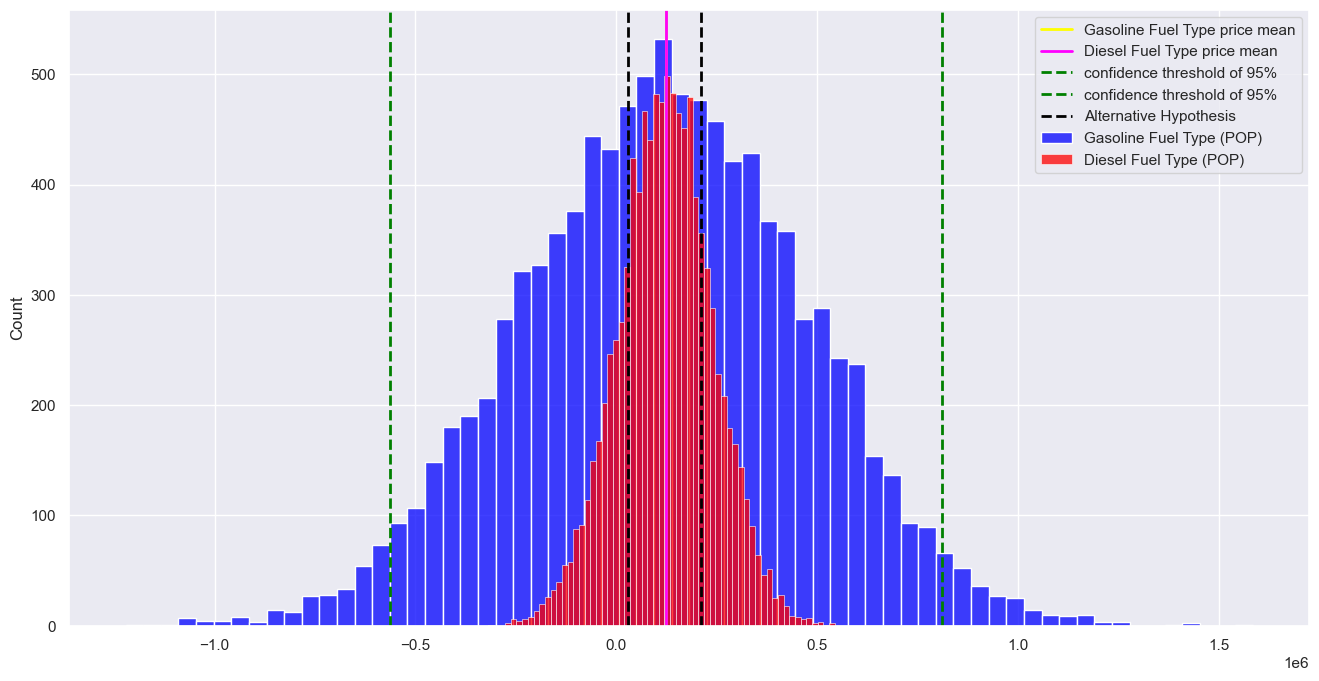

In [40]:
# simulation
avg_gas_pop = np.random.normal(avg_gas['avg_price_brl'].mean(),avg_gas['avg_price_brl'].std(),10000)
avg_dis_pop = np.random.normal(avg_dis['avg_price_brl'].mean(),avg_dis['avg_price_brl'].std(),10000)

# confidence interval based on Gasoline fuel type
ci = stats.norm.interval(0.95, avg_gas['avg_price_brl'].mean(), avg_gas['avg_price_brl'].std())

plt.figure(figsize=(16,8))
sns.histplot(avg_gas_pop, label='Gasoline Fuel Type (POP)',color='blue')
sns.histplot(avg_dis_pop, label='Diesel Fuel Type (POP)',color='red')

# mean
plt.axvline(avg_gas['avg_price_brl'].mean(), color='yellow', linewidth=2, label='Gasoline Fuel Type price mean')
plt.axvline(avg_dis['avg_price_brl'].mean(), color='magenta',  linewidth=2, label='Diesel Fuel Type price mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# alternative hypotesis
plt.axvline(avg_gas_pop.mean()+t_stat*avg_gas_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(avg_dis_pop.mean()-t_stat*avg_gas_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
print(ci[0])
print(ci[1])

After doing some calculations we know that our P-value is `0.791`, which means that we `Fail to Reject H0`.

We now know that there is no significant difference in average car prices between car using Gasoline fuel type and car using Diesel fuel type. 

So we can say that if our customer want to choose between two different car with different fuel type, there isn't any significance difference in terms of average car prices between the two compared cars.

## Conclusion & Overall Analysis

After doing some thorough analysis within this notebook we can answer our problem statement, which is:

`Find what are the factors that determine average car price in Brazil on 2022`

We can conclude that:
* The average car prices in Brazil are mainly affected by its brands, year model, and type of gear transmission it use.

* The most popular car brand in Brazil is GM - Chevrolet, but their popularity does not mean higher the prices compared to its competitor, where Mercedez-Benz is the most expansive car in Brazil.

* Year model also affect car prices in general, because the newer it is the more expansive it may become. Using our data 2023 model is the most expensive compared to another year in the last decade.

* The oldest car in brazil are mainly consist of Ford and GM - Chevrolet, however their reliablity does not translate to higher car prices, where both are ranked fifth and sixth consecutively.

* Car with automatic transmission does affect the car price to be more expansive than car with manual transmission. This is caused by higher production cost while manufacturing the automatic gear and also because it is more complex system than manual transmission.

* Resale value of a car is varied between car brands, whilst others are retained their value quite well there are some car brands lose their value in astonishing pace. This showed by Mercedes-Benz car brand, even though they have higher price than others they don't retain their value over the years. This may be caused because their high maintenance cost which make customer avoid to buy this brand, thus the lower resale value occurred.

* We use hypothesis testing to know whether fuel type does affect the average car prices significantly or not. The result of our test is that different fuel type, in this case Gasoline and Diesel, do not translate into different average price of a car.

Using this information we might say that we have answered all the question asked, and know more information about this dataset. We hope that this is might be useful for further anlysis within our data team.
